# Inequality conditions

To get to this stage of the notebooks, you will have encountered examples of how boolean logic can be implemented in a quantum circuit through controlled operations and NOT gates, and likely have a good grasp of how to perform AND, NAND, OR and XOR operations on a quantum computer (if not, this would be a good point to familiarize yourself with these operations as an exercise). 

Here we will look into how to condition an operation $\hat{U}$ based upon inequalities given some input $x$ and an inequality $x\ge a$. 

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
import qiskit_tools as qt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
digit = 2
a = 1

In [3]:
phase = False

nint = qt.get_nint([digit,a])
npres = qt.get_npres([digit,a])
n = nint + npres

if phase:
    n+=1

print(n, nint, npres)

2 2 0


In [4]:
binary_x = qt.my_binary_repr(digit, n, nint=nint, phase=phase)
binary_a = qt.my_binary_repr(a, n, nint=nint, phase=phase)

In [5]:
print(binary_x,binary_a)

10 01


In [6]:
print('It is',digit>=a,'that',str(digit)+' >= '+str(a)+'.')

It is True that 2 >= 1.


In [7]:
qx = QuantumRegister(n, 'x')
qtarg = QuantumRegister(1, 'targ')
qans = QuantumRegister(n-1, 'anc')
out_reg = ClassicalRegister(1,'out_reg')
circ = QuantumCircuit(qx, qtarg, qans, out_reg)

In [8]:
x_gate = qt.input_bits_to_qubits(binary_x, circ, reg=qx, wrap=True)
circ.append(x_gate, qx);

In [9]:
intcomp_gate = qt.integer_compare(circ, qx, qtarg, qans, a, geq=True, wrap=True)
circ.append(intcomp_gate, [*qx, *qtarg, *qans]);

In [10]:
circ.measure(qtarg, out_reg);

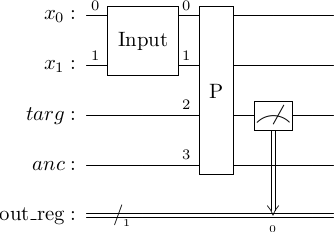

In [11]:
circ.draw('latex')

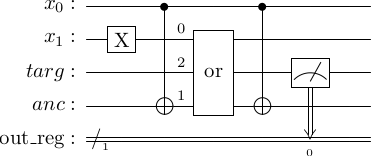

In [12]:
circ.decompose(reps=1).draw('latex')

In [13]:
shots=10
emulator = Aer.get_backend('qasm_simulator')
job = execute(circ, emulator, shots=shots )
hist = job.result().get_counts()

In [14]:
print('Target:')
print(digit,'>=',a,'=',digit>=a)

print('Result:')
for label in hist.keys():
    print(digit,'>=',a,'=',bool(qt.bin_to_dec(label, nint=nint, phase=False)),'->',label,'with probability',float(hist[label])/shots)

Target:
2 >= 1 = True
Result:
2 >= 1 = True -> 1 with probability 1.0


In [15]:
digit = 1.5
a = 2.25

In [16]:
phase = False

nint = qt.get_nint([digit,a])
npres = qt.get_npres([digit,a])
n = nint + npres

if phase:
    n+=1

print(n, nint, npres)

4 2 2


In [17]:
binary_x = qt.my_binary_repr(digit, n, nint=nint, phase=phase)
binary_a = qt.my_binary_repr(a, n, nint=nint, phase=phase)

In [18]:
int_x = qt.bin_to_dec(binary_x, nint=None, phase=False)
int_a = qt.bin_to_dec(binary_a, nint=None, phase=False)

In [19]:
print(digit,'->',binary_x,'->',int(int_x),',',a,'->',binary_a,'->',int(int_a))

1.5 -> 0110 -> 6 , 2.25 -> 1001 -> 9


In [20]:
print('It is',digit>=a,'that',str(digit)+' >= '+str(a)+', and it is',int_x>=int_a,'that',str(int_x)+' >= '+str(int_a))

It is False that 1.5 >= 2.25, and it is False that 6.0 >= 9.0


In [21]:
qx = QuantumRegister(n, 'x')
qtarg = QuantumRegister(1, 'targ')
qans = QuantumRegister(n-1, 'anc')
out_reg = ClassicalRegister(1,'out_reg')
circ = QuantumCircuit(qx, qtarg, qans, out_reg)

In [22]:
x_gate = qt.input_bits_to_qubits(binary_x, circ, reg=qx, wrap=True)
circ.append(x_gate, qx);

In [23]:
intcomp_gate = qt.integer_compare(circ, qx, qtarg, qans, int_a, geq=True, wrap=True)
circ.append(intcomp_gate, [*qx, *qtarg, *qans]);

In [24]:
circ.measure(qtarg, out_reg);

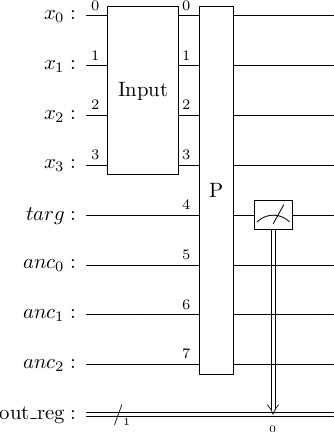

In [25]:
circ.draw('latex')

In [26]:
shots=10
emulator = Aer.get_backend('qasm_simulator')
job = execute(circ, emulator, shots=shots )
hist = job.result().get_counts()

In [27]:
print('Target:')
print(digit,'>=',a,'=',digit>=a)

print('Result:')
for label in hist.keys():
    print(digit,'>=',a,'=',bool(qt.bin_to_dec(label, nint=nint, phase=False)),'->',label,'with probability',float(hist[label])/shots)

Target:
1.5 >= 2.25 = False
Result:
1.5 >= 2.25 = False -> 0 with probability 1.0


In [28]:
digit = -1.5
a = 2.25

In [29]:
phase = True

nint = qt.get_nint([digit,a])
npres = qt.get_npres([digit,a])
n = nint + npres

if phase:
    n+=1

print(n, nint, npres)

5 2 2


In [30]:
binary_x = qt.my_binary_repr(digit, n, nint=nint, phase=phase)
binary_a = qt.my_binary_repr(a, n, nint=nint, phase=phase)

In [31]:
binary_x_ = qt.my_binary_repr(digit, n, nint=nint, phase=phase)

if binary_x[0]=='0':
    binary_x_ = '1'+binary_x[1:]
elif binary_x[0]=='1':
    binary_x_ = '0'+binary_x[1:]

In [32]:
binary_a_ = qt.my_binary_repr(a, n, nint=nint, phase=phase)

if binary_a[0]=='0':
    binary_a_ = '1'+binary_a[1:]
elif binary_a[0]=='1':
    binary_a_ = '0'+binary_a[1:]

In [33]:
int_x = qt.bin_to_dec(binary_x_, nint=None, phase=False)
int_a = qt.bin_to_dec(binary_a_, nint=None, phase=False)

In [34]:
print(digit,'->',binary_x,'->',binary_x_,'->',int(int_x),',',a,'->',binary_a,'->',binary_a_,'->',int(int_a))

-1.5 -> 11010 -> 01010 -> 10 , 2.25 -> 01001 -> 11001 -> 25


In [35]:
print('It is',digit>=a,'that',str(digit)+' >= '+str(a)+', and it is',int_x>=int_a,'that',str(int_x)+' >= '+str(int_a))

It is False that -1.5 >= 2.25, and it is False that 10.0 >= 25.0


In [36]:
qx = QuantumRegister(n, 'x')
qtarg = QuantumRegister(1, 'targ')
qans = QuantumRegister(n-1, 'anc')
out_reg = ClassicalRegister(1,'out_reg')
circ = QuantumCircuit(qx, qtarg, qans, out_reg)

In [37]:
x_gate = qt.input_bits_to_qubits(binary_x, circ, reg=qx, wrap=True)
circ.append(x_gate, qx);

In [38]:
circ.x(qx[-1]);
intcomp_gate = qt.integer_compare(circ, qx, qtarg, qans, int_a, geq=True, wrap=True)
circ.append(intcomp_gate, [*qx, *qtarg, *qans]);
circ.x(qx[-1]);

In [39]:
circ.measure(qtarg, out_reg);

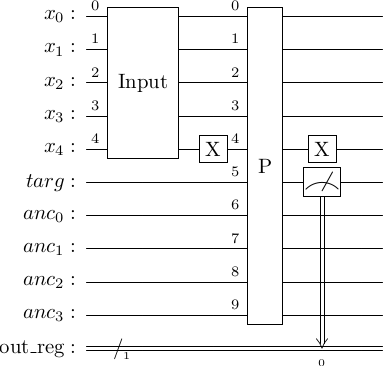

In [40]:
circ.draw('latex')

In [41]:
shots=10
emulator = Aer.get_backend('qasm_simulator')
job = execute(circ, emulator, shots=shots )
hist = job.result().get_counts()

In [42]:
print('Target:')
print(digit,'>=',a,'=',digit>=a)

print('Result:')
for label in hist.keys():
    print(digit,'>=',a,'=',bool(qt.bin_to_dec(label, nint=nint, phase=False)),'->',label,'with probability',float(hist[label])/shots)

Target:
-1.5 >= 2.25 = False
Result:
-1.5 >= 2.25 = False -> 0 with probability 1.0


In [43]:
digit = 1.5
a = -2.25

phase = True

nint = qt.get_nint([digit,a])
npres = qt.get_npres([digit,a])
n = nint + npres

if phase:
    n+=1
    
binary_x = qt.my_binary_repr(digit, n, nint=nint, phase=phase)
binary_a = qt.my_binary_repr(a, n, nint=nint, phase=phase)

binary_x_ = qt.my_binary_repr(digit, n, nint=nint, phase=phase)

if binary_x[0]=='0':
    binary_x_ = '1'+binary_x[1:]
elif binary_x[0]=='1':
    binary_x_ = '0'+binary_x[1:]
    
binary_a_ = qt.my_binary_repr(a, n, nint=nint, phase=phase)

if binary_a[0]=='0':
    binary_a_ = '1'+binary_a[1:]
elif binary_a[0]=='1':
    binary_a_ = '0'+binary_a[1:]
    
int_x = qt.bin_to_dec(binary_x_, nint=None, phase=False)
int_a = qt.bin_to_dec(binary_a_, nint=None, phase=False)

In [44]:
qx = QuantumRegister(n, 'x')
qtarg = QuantumRegister(1, 'targ')
qans = QuantumRegister(n-1, 'anc')
out_reg = ClassicalRegister(1,'out_reg')
circ = QuantumCircuit(qx, qtarg, qans, out_reg)

x_gate = qt.input_bits_to_qubits(binary_x, circ, reg=qx, wrap=True)
circ.append(x_gate, qx);

circ.x(qx[-1]);
intcomp_gate = qt.integer_compare(circ, qx, qtarg, qans, int_a, geq=False, wrap=True)
circ.append(intcomp_gate, [*qx, *qtarg, *qans]);
circ.x(qx[-1]);

circ.measure(qtarg, out_reg);

In [45]:
shots=10
emulator = Aer.get_backend('qasm_simulator')
job = execute(circ, emulator, shots=shots )
hist = job.result().get_counts()

In [46]:
print('Target:')
print(digit,'<=',a,'=',digit<=a)

print('Result:')
for label in hist.keys():
    print(digit,'<=',a,'=',bool(qt.bin_to_dec(label, nint=nint, phase=False)),'->',label,'with probability',float(hist[label])/shots)

Target:
1.5 <= -2.25 = False
Result:
1.5 <= -2.25 = False -> 0 with probability 1.0
